# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split

# Importing train and test dataset

In [2]:
train=pd.read_csv('SalaryData_Train(1).csv')
test=pd.read_csv('SalaryData_Test(1).csv')

In [3]:
train.shape #train set has 30161 records and 14 features

(30161, 14)

In [4]:
train.head() #Retrieving first 5 records of the train set to check the features.

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.shape #train set has 15060 records and 14 features

(15060, 14)

# EDA/ Feature Engineering:

In [6]:
df=pd.concat([test,train],axis=0) # Concatenating the train and test dataset on rows to get one dataframe, so it will be easy 
#to perform EDA.

In [7]:
df.shape 

(45221, 14)

In [8]:
df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='') #Resetting the index of df dataframe in order
#of 0 to 45220, inplace=True will change values permanently in the df dataframe.

In [9]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45217,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45218,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45219,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
 df.info() # obtaining the datatypes of all the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [11]:
df.isnull().sum() # There are no null values in any features

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
df_num=[]
df_cat=[]
for i in df.columns:
    if(df[i].dtype=='int64'):
        df_num.append(i)
    else:
        df_cat.append(i)
print(df_num)
print(df_cat)

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


### In the above block of code I am seaparating the categorical features and numerical features using for loop.

In [13]:
for i in df_cat:
    unique_count=df[i].value_counts()
    print('The count. of unique labels in',i,'is:')
    print(unique_count)

The count. of unique labels in workclass is:
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
The count. of unique labels in education is:
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
The count. of unique labels in maritalstatus is:
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

### In the above block of code we are checking the count of unique labels for each categorical variable while iteratating through a for loop of the categorical features list.

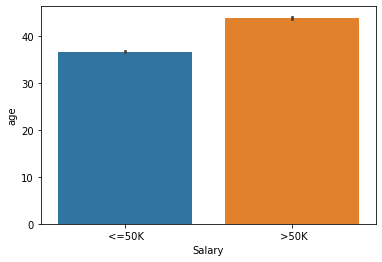

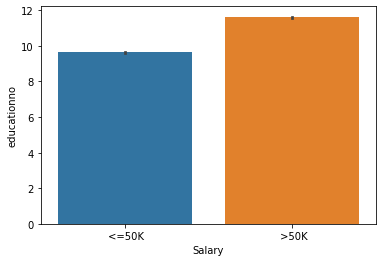

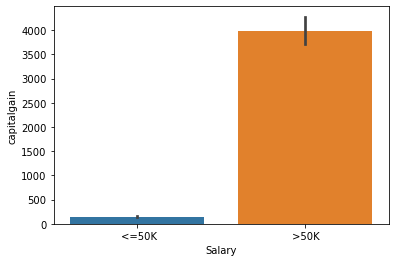

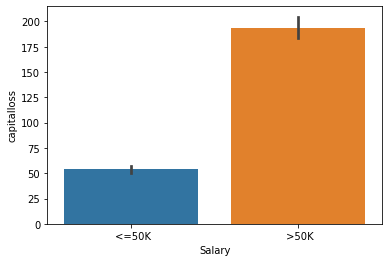

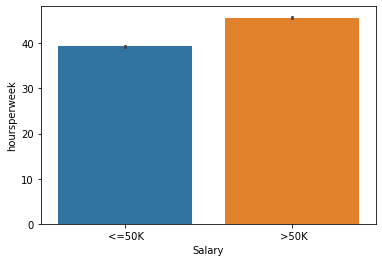

In [14]:
for i in df_num:
    sns.barplot(x=df['Salary'],y=df[i]) #plotting a boxplot for each input feature of 3 different class.
    plt.ylabel(i)
    plt.show()

In [15]:
df['Salary'].unique() # checking for unique labels in salary

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df['Salary']=np.where(df['Salary']==' <=50K',0,1)
df['Salary']

0        0
1        0
2        1
3        1
4        0
        ..
45216    0
45217    1
45218    0
45219    0
45220    1
Name: Salary, Length: 45221, dtype: int32

### Converting the labels into numerical feature using the np.where which for value  <=50K in the salary feature and converts it to 0 else it converts to 1.

In [17]:
df_ord=['workclass','occupation'] # categorising the ordinal features of the categories into a variable
#df_ord. I have categorised the workclass,education and occupation because the ordering is important here.

In [18]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
45217,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
45218,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
45219,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [19]:
for i in df_ord:
    print(df.groupby(by=i)['Salary'].mean().sort_values(ascending=False))

workclass
 Self-emp-inc        0.554070
 Federal-gov         0.390469
 Local-gov           0.295161
 Self-emp-not-inc    0.278978
 State-gov           0.267215
 Private             0.217709
 Without-pay         0.095238
Name: Salary, dtype: float64
occupation
 Exec-managerial      0.479111
 Prof-specialty       0.450067
 Protective-serv      0.314549
 Tech-support         0.289437
 Armed-Forces         0.285714
 Sales                0.269046
 Craft-repair         0.225083
 Transport-moving     0.206390
 Adm-clerical         0.136462
 Machine-op-inspct    0.122937
 Farming-fishing      0.116216
 Handlers-cleaners    0.065982
 Other-service        0.040765
 Priv-house-serv      0.012931
Name: Salary, dtype: float64


In [20]:
for i in df_ord:
    ord_labels=df.groupby(i)['Salary'].mean().sort_values().index #grouping each feature, obtaining mean and sorting them in
    #the descending order. index will give the labels with the highest mean.
    ord_labels_dict={k:i for i,k in enumerate(ord_labels,0)} # assigning the value 0,1,2..etc. for the labels using 
    #enumerate function which will iterate through the labels and converting them to dictionary.
    df[i]=df[i].map(ord_labels_dict) # mapping the values.
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,1,11th,7,Never-married,4,Own-child,Black,Male,0,0,40,United-States,0
1,38,1,HS-grad,9,Married-civ-spouse,3,Husband,White,Male,0,0,50,United-States,0
2,28,4,Assoc-acdm,12,Married-civ-spouse,11,Husband,White,Male,0,0,40,United-States,1
3,44,1,Some-college,10,Married-civ-spouse,4,Husband,Black,Male,7688,0,40,United-States,1
4,34,1,10th,6,Never-married,1,Not-in-family,White,Male,0,0,30,United-States,0


### in the above line of code I am applying target guided ordinal enconding by grouping the features on the basis of mean of salary and sorting them in the descending order. Ranking is given based on the highest mean. Target guided ordinal encoding works when we have binary class as the output.

In [21]:
df['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [22]:
df_dict={' Preschool':1, ' 1st-4th':2, ' 5th-6th':3, ' 7th-8th':4, ' 9th':5, ' 10th':6, ' 11th':7, ' 12th':8, ' HS-grad':9, ' Prof-school':10,
         ' Assoc-acdm':11, ' Assoc-voc':12, ' Some-college':13, ' Bachelors':15, ' Masters':15, ' Doctorate':16}

In [23]:
df['education']=df['education'].map(df_dict)

In [24]:
df['education']

0         7
1         9
2        11
3        13
4         6
         ..
45216    11
45217     9
45218     9
45219     9
45220     9
Name: education, Length: 45221, dtype: int64

### In the above since education is ordinal category we will assign ordinal values for each label in the order Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

In [25]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,1,7,7,Never-married,4,Own-child,Black,Male,0,0,40,United-States,0
1,38,1,9,9,Married-civ-spouse,3,Husband,White,Male,0,0,50,United-States,0
2,28,4,11,12,Married-civ-spouse,11,Husband,White,Male,0,0,40,United-States,1
3,44,1,13,10,Married-civ-spouse,4,Husband,Black,Male,7688,0,40,United-States,1
4,34,1,6,6,Never-married,1,Not-in-family,White,Male,0,0,30,United-States,0


In [26]:
def one_hot_top(df,variable): #defining function one_hot_top
    top_10=[x for x in df[variable].value_counts().sort_values(ascending=False).head(10).index] #obtaining top 10 frequent
    #categories
    for label in top_10:
        df[variable+'_'+label]=np.where(df[variable]==i,1,0) #creating columns of labels using np.where function.
one_hot_top(df,'native') ##calling the function.

In [27]:
df.drop('native',axis=1,inplace=True) #dropping the native feature since we have obtained the encoded features with 
#0's and 1's
df.columns 

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary', 'native_ United-States',
       'native_ Mexico', 'native_ Philippines', 'native_ Germany',
       'native_ Puerto-Rico', 'native_ Canada', 'native_ India',
       'native_ El-Salvador', 'native_ Cuba', 'native_ England'],
      dtype='object')

### I have taken the top 10 labels from the native features and applied one hot encoding. This is a technique discovered by KDD orange wherein when we have many labels in a category we take 10 most frequent labels from that category and apply one hot encoding to prevent curse of ddimensionality.

In [28]:
df['sex']=np.where(df['sex']=='Male',0,1) 
df['sex']

0        1
1        1
2        1
3        1
4        1
        ..
45216    1
45217    1
45218    1
45219    1
45220    1
Name: sex, Length: 45221, dtype: int32

### Using label encoding for sex feature. Male is encoded as 0 and female as 1.

In [29]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,native_ United-States,native_ Mexico,native_ Philippines,native_ Germany,native_ Puerto-Rico,native_ Canada,native_ India,native_ El-Salvador,native_ Cuba,native_ England
0,25,1,7,7,Never-married,4,Own-child,Black,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,1,9,9,Married-civ-spouse,3,Husband,White,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28,4,11,12,Married-civ-spouse,11,Husband,White,1,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,13,10,Married-civ-spouse,4,Husband,Black,1,7688,...,0,0,0,0,0,0,0,0,0,0
4,34,1,6,6,Never-married,1,Not-in-family,White,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_nom=df[['maritalstatus','relationship','race']]

In [31]:
for i in df_nom:
    count=dict(df[i].value_counts()) # obtaib=ning the count of each feature using value_counts and converting it to 
#dictionary.
    df[i]=df[i].map(count) #mapping the dictionary values to the actual values.
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,native_ United-States,native_ Mexico,native_ Philippines,native_ Germany,native_ Puerto-Rico,native_ Canada,native_ India,native_ El-Salvador,native_ Cuba,native_ England
0,25,1,7,7,14597,4,6626,4228,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,1,9,9,21055,3,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28,4,11,12,21055,11,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,13,10,21055,4,18666,4228,1,7688,...,0,0,0,0,0,0,0,0,0,0
4,34,1,6,6,14597,1,11702,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,27,1,11,12,21055,10,2091,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
45217,40,1,9,9,21055,4,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
45218,58,1,9,9,1277,5,4788,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
45219,22,1,9,9,14597,5,6626,38902,1,0,...,0,0,0,0,0,0,0,0,0,0


### In the above line of code we are performing frequency encoding of df_nom features. All the labels of df_nom will have the count of the labels.

# Obtaining Train and Test sets.

In [32]:
train=df[df.index.isin(train.index)] # Now to obtain the train set I will fiter the index of train from df and obtain 
#the entire train dataset.
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,native_ United-States,native_ Mexico,native_ Philippines,native_ Germany,native_ Puerto-Rico,native_ Canada,native_ India,native_ El-Salvador,native_ Cuba,native_ England
0,25,1,7,7,14597,4,6626,4228,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,1,9,9,21055,3,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28,4,11,12,21055,11,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,13,10,21055,4,18666,4228,1,7688,...,0,0,0,0,0,0,0,0,0,0
4,34,1,6,6,14597,1,11702,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,34,1,13,10,21055,10,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
30157,38,1,9,9,21055,7,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
30158,33,1,13,10,1277,5,4788,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
30159,27,1,9,9,21055,5,2091,4228,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test=df[df.index.isin(test.index)]
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,...,native_ United-States,native_ Mexico,native_ Philippines,native_ Germany,native_ Puerto-Rico,native_ Canada,native_ India,native_ El-Salvador,native_ Cuba,native_ England
0,25,1,7,7,14597,4,6626,4228,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,1,9,9,21055,3,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28,4,11,12,21055,11,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,13,10,21055,4,18666,4228,1,7688,...,0,0,0,0,0,0,0,0,0,0
4,34,1,6,6,14597,1,11702,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,1,15,13,14597,12,6626,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
15056,39,1,15,13,6297,12,11702,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
15057,38,1,15,13,21055,12,18666,38902,1,0,...,0,0,0,0,0,0,0,0,0,0
15058,44,1,15,13,6297,5,6626,1303,1,5455,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_train=train['Salary']
x_train=train[['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek',
       'native_ United-States', 'native_ Mexico', 'native_ Philippines',
       'native_ Germany', 'native_ Puerto-Rico', 'native_ Canada',
       'native_ El-Salvador', 'native_ India', 'native_ Cuba',
       'native_ England']]

In [35]:
y_test=train['Salary']
x_test=train[['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek',
       'native_ United-States', 'native_ Mexico', 'native_ Philippines',
       'native_ Germany', 'native_ Puerto-Rico', 'native_ Canada',
       'native_ El-Salvador', 'native_ India', 'native_ Cuba',
       'native_ England']]

In [36]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.transform(x_test)

### Performing Standardisation using sklearn Standardscaler and fitting it to train and test dataset.Since the high magnitude features are dominant over the low magnitude ones, we perform standarisation of the features using the stanfdardscaler.

# Fitting the model:

In [39]:
model=GaussianNB()
model.fit(x_train_scaled,y_train)
print('Accuracy of the model is',model.score(x_test_scaled,y_test)*100)

Accuracy of the model is 81.52249593846358
